### Clusterin using Agglomerative technique
the uber travel history is categorized as low, high and medium distances traveled 

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
data=pd.read_csv('Uber Drives 2016.csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [104]:
data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [105]:
# last row is the total of all columns, so we have to delet that 
data=data.iloc[:-1,:]
data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [106]:
data.shape

(1155, 7)

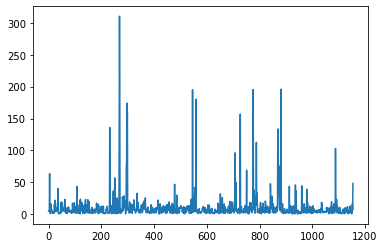

In [107]:
#miles plot 
plt.plot(data['MILES*'])

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

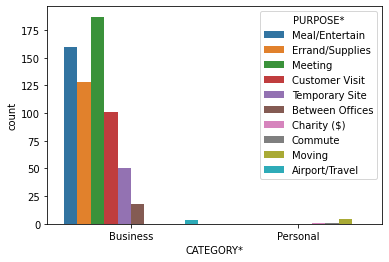

In [111]:
#checking the number of business and personal travels 
sns.countplot(x=data['CATEGORY*'],hue=data['PURPOSE*'],data=data)

In [118]:
# For normalizing the data 
from scipy.stats import zscore

In [121]:
miles=pd.DataFrame(data['MILES*'])
milescaled=pd.DataFrame(zscore(miles))
milescaled

,MILES*
0,-0.253449
1,-0.258085
2,-0.267358
3,-0.271994
4,2.463317
...,...
1150,-0.457439
1151,-0.309083
1152,0.261160
1153,-0.193180


In [122]:
# For clustering we have to import sklearn library
from sklearn.cluster import AgglomerativeClustering

In [123]:
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')

In [124]:
# Now we can fit the data
model.fit(milescaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [125]:
# For showing the results
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
data['Labels']=model.labels_

In [127]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Labels
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,0
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0


In [128]:
# now we will see how many categories are there
data['Labels'].nunique()

3

In [129]:
data['Labels'].value_counts()

0    1142
1      12
2       1
Name: Labels, dtype: int64